# **ANN using the Fashion MNIST Dataset**

In [63]:
# To store and process in a dataframe
import pandas as pd
# Advancec ploting
import seaborn as sns
# For ploting graphs
import matplotlib.pyplot as plt
# For numerical analysis
import numpy as np
from numpy import argmax
# Layers
from keras.layers import Dense, Flatten
# Train test split
from sklearn.model_selection import train_test_split
#Stop the training when there is no improvement in the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
# Model performance metrics
from sklearn.metrics import classification_report
# Utility functions
from tensorflow.keras.utils import to_categorical
# Sequential model
from tensorflow.keras.models import Sequential, Model
from imgaug import augmenters
from random import randint

#### **Step 1: Load the Dataset**
##### This step is loading the Fashion MNIST dataset from Kaggle. First, it removes any existing Kaggle configuration files and directories from the system. Then, it installs the Kaggle library using pip. Next, it uploads the Kaggle API credentials file (kaggle.json) which allows access to the Kaggle dataset. The credentials file is saved in the .kaggle directory in the user's home folder and its permission is changed. The Fashion MNIST dataset is downloaded from Kaggle using the kaggle datasets download command. Finally, the code unzips the downloaded files and loads the train and test datasets using pandas read_csv function

In [2]:
# Remove any file and Delete .kaggle directory
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
# Install Kaggle
!pip install -q kaggle

In [4]:
# To upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hansakajayawardana","key":"44881d9d76ac3feedc68f490d49dc0a3"}'}

In [5]:
# To save this file into a directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# To change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Download the Fashion MNIST dataset from Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

 95% 65.0M/68.8M [00:01<00:00, 47.2MB/s]
100% 68.8M/68.8M [00:01<00:00, 50.4MB/s]


In [7]:
# Extract the files in the zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [8]:
# Load Data 
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

###### **Data Visulization After Step 1**

In [9]:
# Train Head
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Test Head
test.head(5) 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Print the number of rows and columns in the train and test datasets
print("Fashion MNIST train -  rows:",train.shape[0]," columns:", train.shape[1])
print("Fashion MNIST test -  rows:",test.shape[0]," columns:", test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [15]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Get Classes Distribution Method Implementation
def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

# Calculate the distribution of the classes in the training dataset
get_classes_distribution(train)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


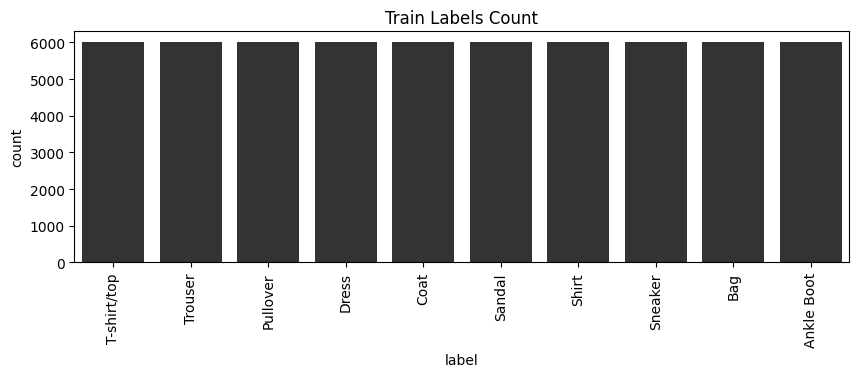

In [26]:
# Plot Label Per Class Method Implementation for Training Dataset
def plot_label_per_class(train):
    # Convert train to pandas dataframe
    train_df = pd.DataFrame(train)

    # Create plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=train_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Train Labels Count')

    plt.show()

# Visualize the class distribution in the training dataset
plot_label_per_class(train)

In [20]:
# Calculate the distribution of the classes in the testing dataset
get_classes_distribution(test)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


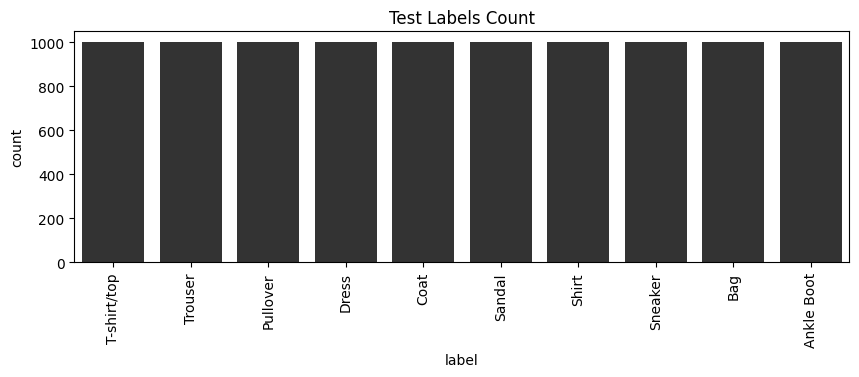

In [28]:
# Plot Label Per Class Method Implementation for Testing Dataset
def plot_label_per_class(test):
    # Convert test to pandas dataframe
    test_df = pd.DataFrame(test)

    # Create plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=test_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Test Labels Count')

    plt.show()

# Visualize the class distribution in the testing dataset
plot_label_per_class(test)

#### **Step 2: Preprocess the Data**
##### This step performs data preprocessing on the Fashion MNIST dataset. First, the image data and their corresponding labels are extracted from the train and test datasets using pandas. Then, the images are reshaped into a 28x28 pixel format as they were originally flattened into a 1D array of 784 pixels. The pixel values are normalized to the range 0 to 1 by dividing each pixel value by 255. This rescales the pixel values to a range suitable for training a neural network.Then split the data into training and testing sets using a 80-20 split.

In [29]:
# Rescaling image data
train_images = np.array(train.iloc[:, 1:])
train_labels = np.array(train.iloc[:, 0])
test_images = np.array(test.iloc[:, 1:])
test_labels = np.array(test.iloc[:, 0])

In [30]:
# Reshaping images
train_images = train_images.reshape(train_images.shape[0], 784)
test_images = test_images.reshape(test_images.shape[0], 784)

# Fix data type and Normalizing images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

###### **Data Visulization After Step 2 (Before Data Spliting)**

In [32]:
#View Training Images Data
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
#View Training Labels Data
train_labels

array([2, 9, 6, ..., 8, 8, 7])

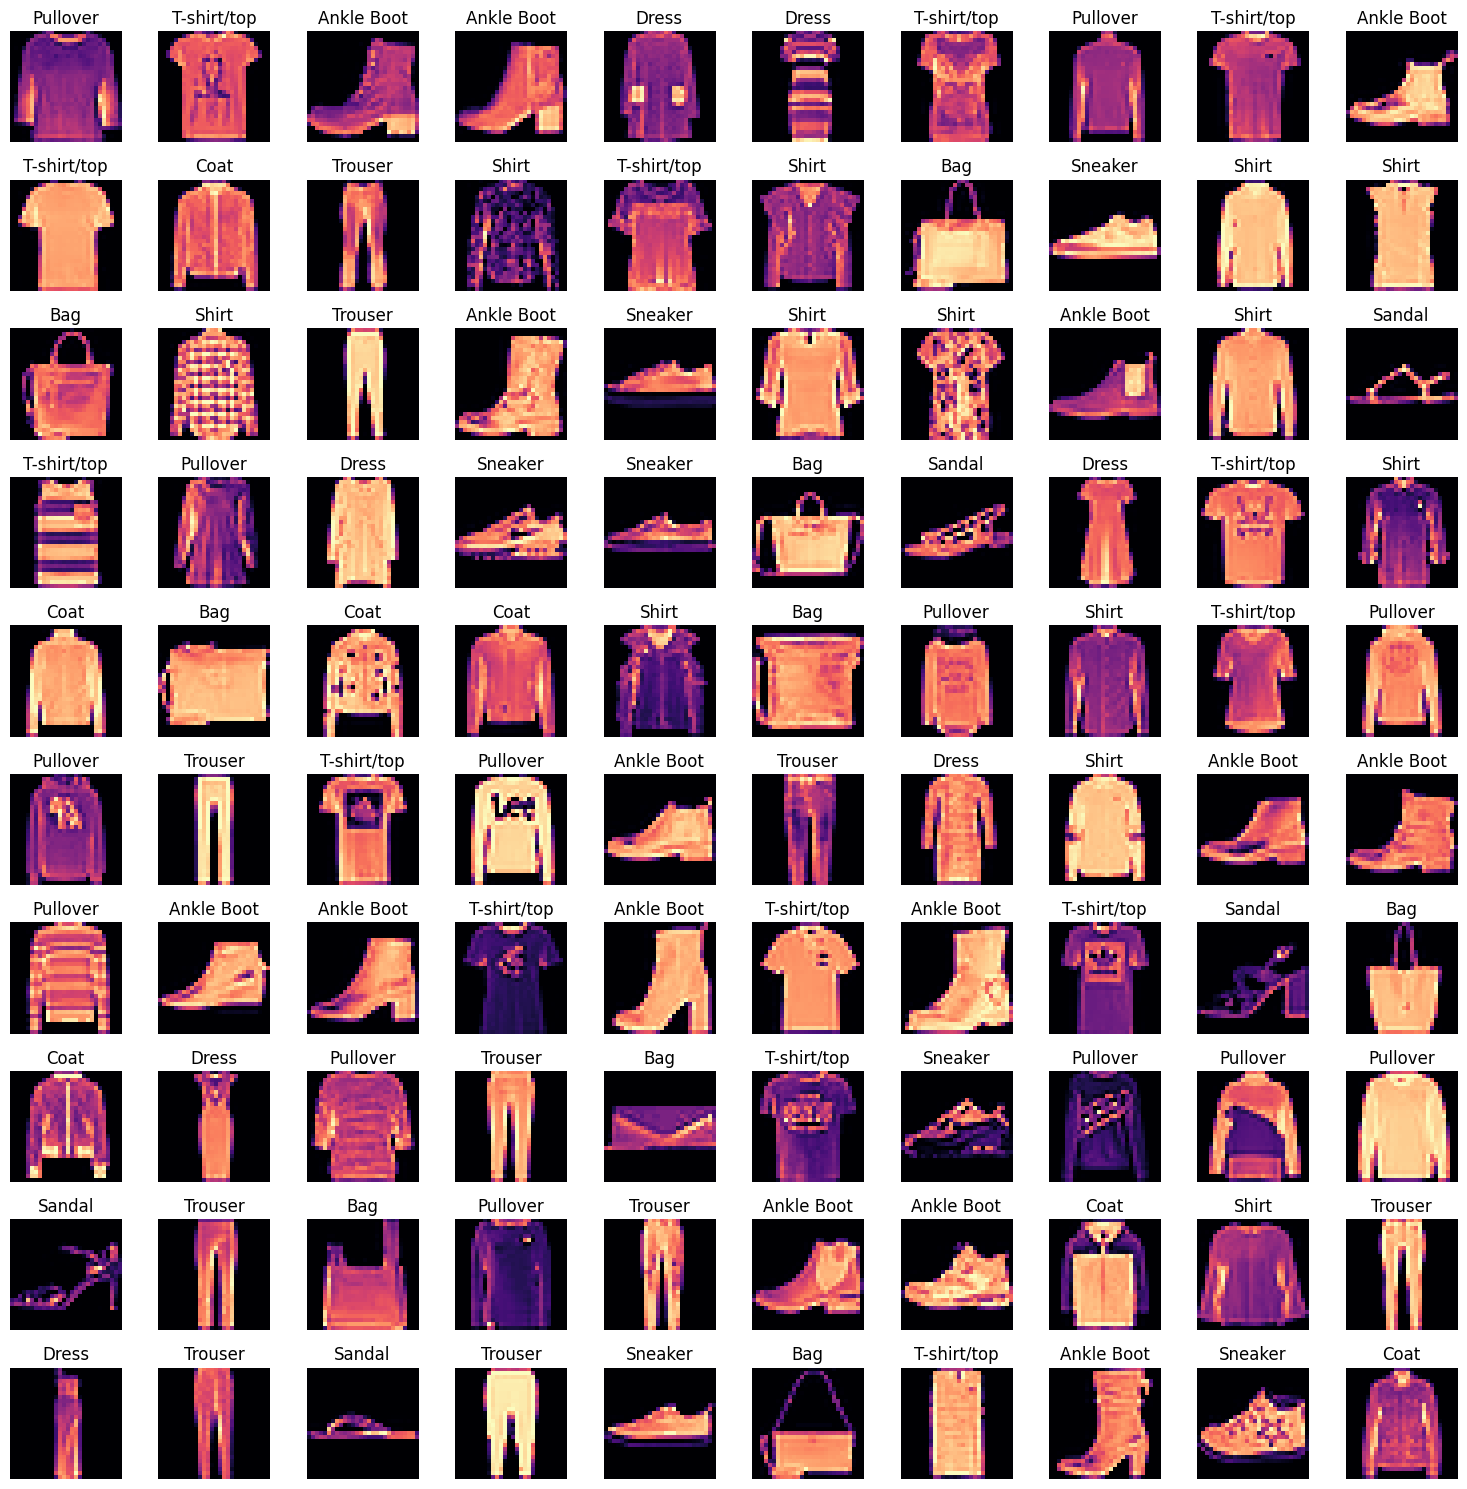

In [34]:
#Data Visualization
#Class Names from Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#First few train images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28,28])
    label = labels[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

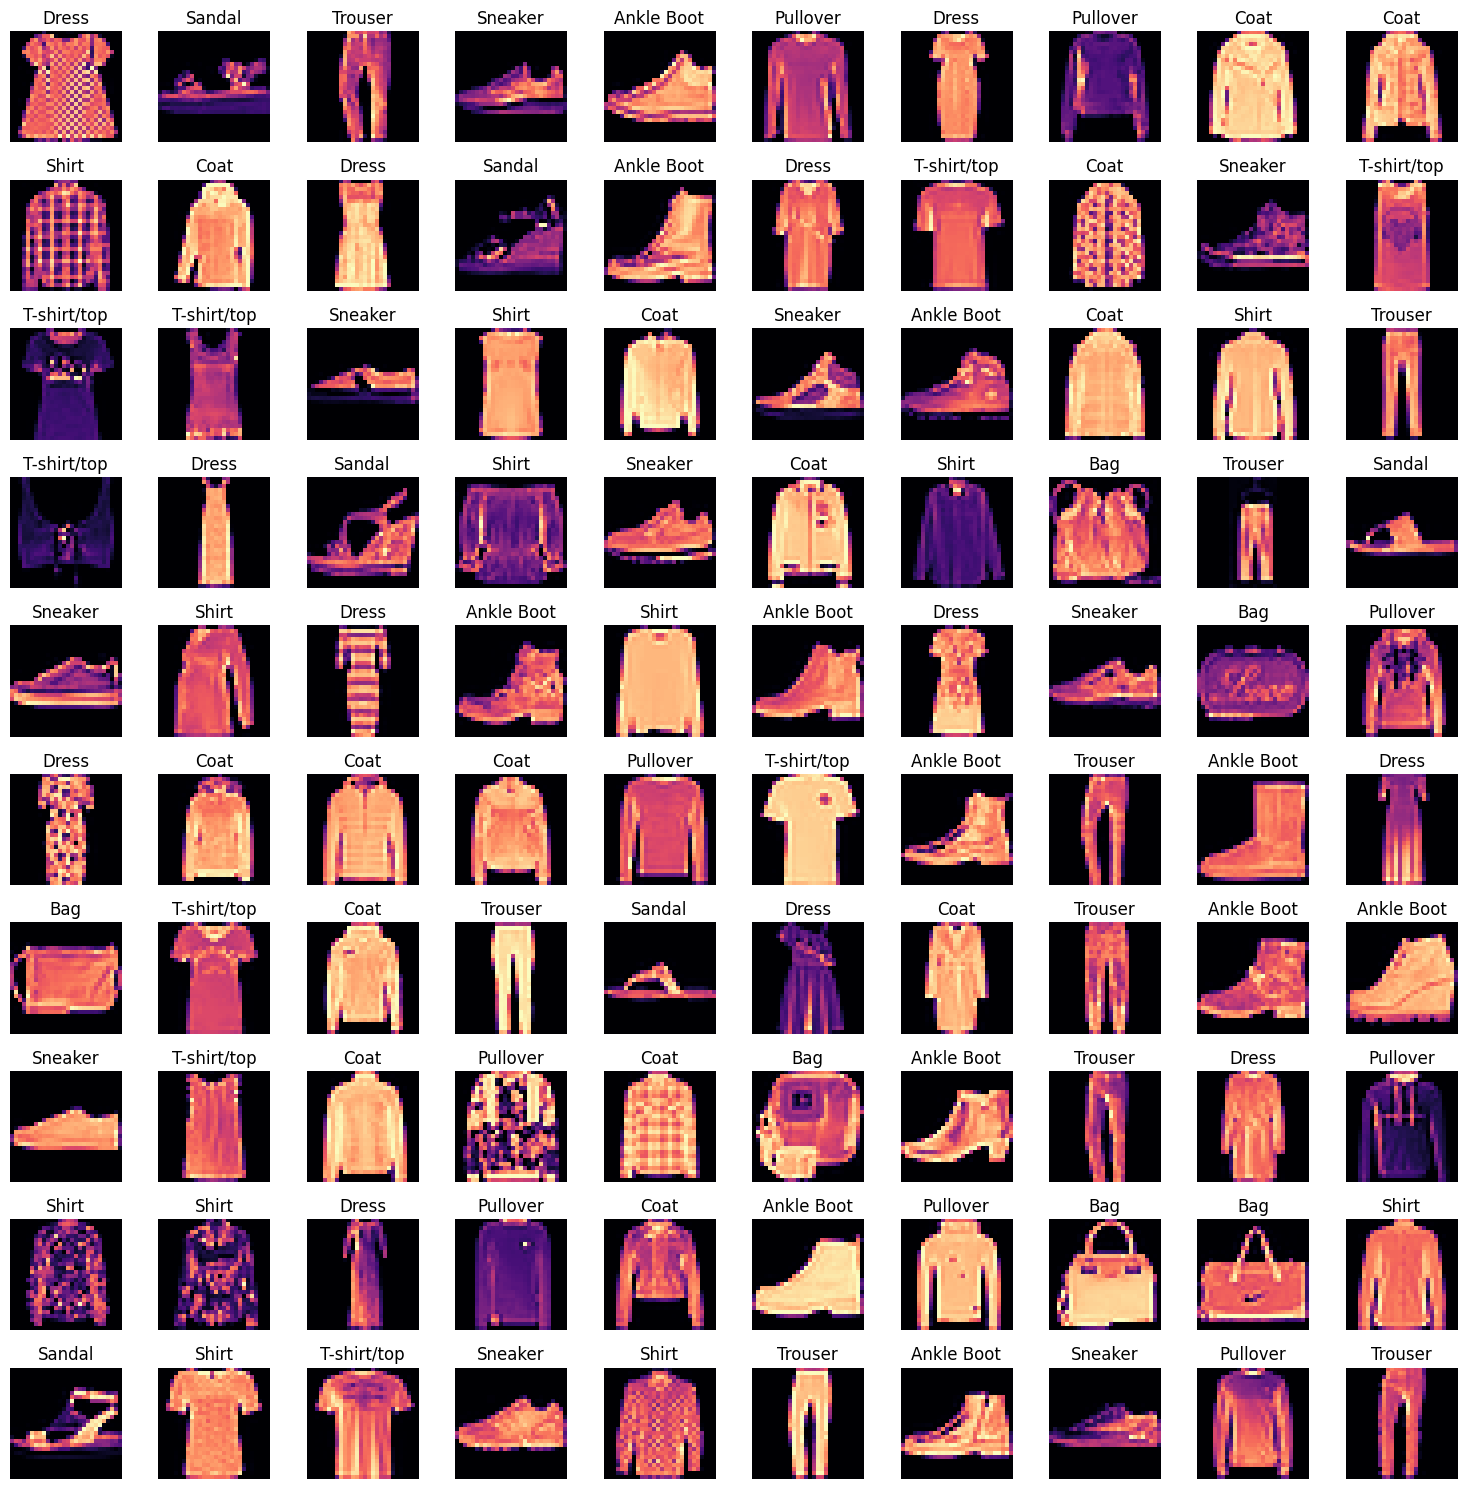

In [35]:
#First few test images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(test_images))
    img = test_images[data_idx].reshape([28, 28])
    label = labels[test_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

#### **Step 3: Build the ANN Model**
##### The step is defining the architecture of the ANN (Artificial Neural Network) model. The model has 3 dense layers with 128, 64, and 10 neurons respectively. The input shape of the model is (784,), which is the flattened version of the Fashion MNIST images. The first layer is a Flatten layer that flattens the input images into a 1D array. The next two layers are dense layers with 128 and 64 neurons respectively, with the activation function set to 'relu'. The final layer is a dense layer with 10 neurons, representing the 10 classes of the Fashion MNIST dataset, and the activation function is set to 'softmax'.

In [51]:
#Model Parameters
INPUT_SHAPE = (784,)
BATCH_SIZE = 128
EPOCHS = 25
VERBOSE = 2

In [52]:
# Build the model
model = Sequential([
    Flatten(input_shape=INPUT_SHAPE),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

#### **Step 4: Train and Evaluate the Model**
##### In this step, first the model parameters such as batch size, epochs and verbosity are defined. The model is then compiled with the optimizer, loss function, and evaluation metric. The model summary is printed to give a summary of the model architecture.

##### The EarlyStopping callback is used to stop the model training when the monitored validation loss does not improve after a certain number of epochs (patience).

##### Then the model is trained on the training dataset using the fit() function with the specified batch size, number of epochs, and verbosity. The EarlyStopping callback is also passed as an argument to the fit function.

##### Finally, the model is evaluated on the testing dataset using the evaluate() function, which returns the loss and accuracy of the model on the testing dataset. The test loss and accuracy are printed to give an indication of how well the model performs on unseen data.

In [53]:
# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
#View Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Halt the training to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [60]:
# Model Fitting
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/25
375/375 - 4s - loss: 0.1605 - accuracy: 0.9395 - val_loss: 0.3465 - val_accuracy: 0.8906 - 4s/epoch - 10ms/step
Epoch 2/25
375/375 - 3s - loss: 0.1588 - accuracy: 0.9401 - val_loss: 0.3541 - val_accuracy: 0.8901 - 3s/epoch - 7ms/step
Epoch 3/25
375/375 - 2s - loss: 0.1551 - accuracy: 0.9417 - val_loss: 0.3562 - val_accuracy: 0.8842 - 2s/epoch - 4ms/step
Epoch 4/25
375/375 - 1s - loss: 0.1473 - accuracy: 0.9454 - val_loss: 0.3566 - val_accuracy: 0.8905 - 1s/epoch - 4ms/step
Epoch 5/25
375/375 - 2s - loss: 0.1432 - accuracy: 0.9464 - val_loss: 0.3411 - val_accuracy: 0.8940 - 2s/epoch - 4ms/step
Epoch 6/25
375/375 - 2s - loss: 0.1384 - accuracy: 0.9481 - val_loss: 0.3590 - val_accuracy: 0.8903 - 2s/epoch - 6ms/step
Epoch 7/25
375/375 - 2s - loss: 0.1374 - accuracy: 0.9490 - val_loss: 0.3692 - val_accuracy: 0.8904 - 2s/epoch - 5ms/step
Epoch 8/25
375/375 - 2s - loss: 0.1329 - accuracy: 0.9497 - val_loss: 0.3938 - val_accuracy: 0.8892 - 2s/epoch - 4ms/step
Epoch 9/25
375/375 - 2s

In [64]:
# Evaluate the model on the testing dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss: {:.2f}%'.format(test_loss*100))
print('Test Accuracy: {:.2f}%'.format(test_acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8918
Test Loss: 38.13%
Test Accuracy: 89.18%


###### **Data Visulization After Step 3 and 4**

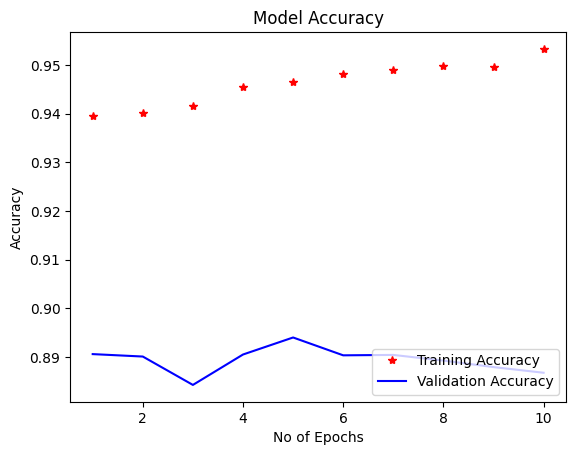

In [65]:
# Data Visualization
# Accuracy plot graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r*', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('./ann_accuracy_plot.png')
plt.show()

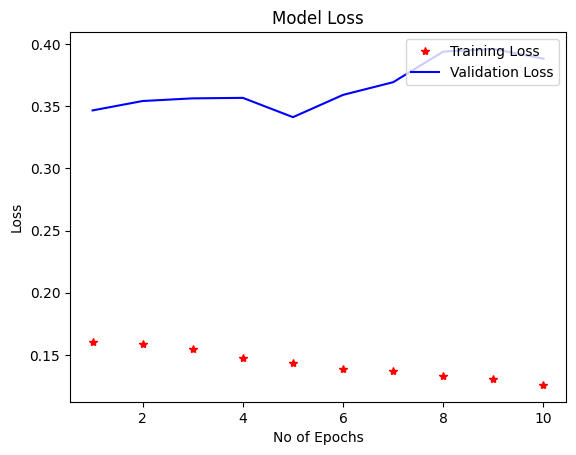

In [66]:
# Data Visualization
# Loss plot graph
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r*', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('./ann_loss_plot.png')
plt.show()

In [67]:
# Predicted values
y_pred = model.predict(X_test)

# Decode predicted labels
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

375/375 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1232
     Trouser       0.96      0.99      0.97      1174
    Pullover       0.85      0.78      0.81      1200
       Dress       0.87      0.90      0.88      1242
        Coat       0.75      0.87      0.80      1185
      Sandal       0.97      0.95      0.96      1141
       Shirt       0.78      0.68      0.72      1243
     Sneaker       0.94      0.95      0.95      1224
         Bag       0.95      0.99      0.97      1149
  Ankle boot       0.96      0.96      0.96      1210

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



<ipython-input-68-03d0a23a6d8d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 6, ind+1)


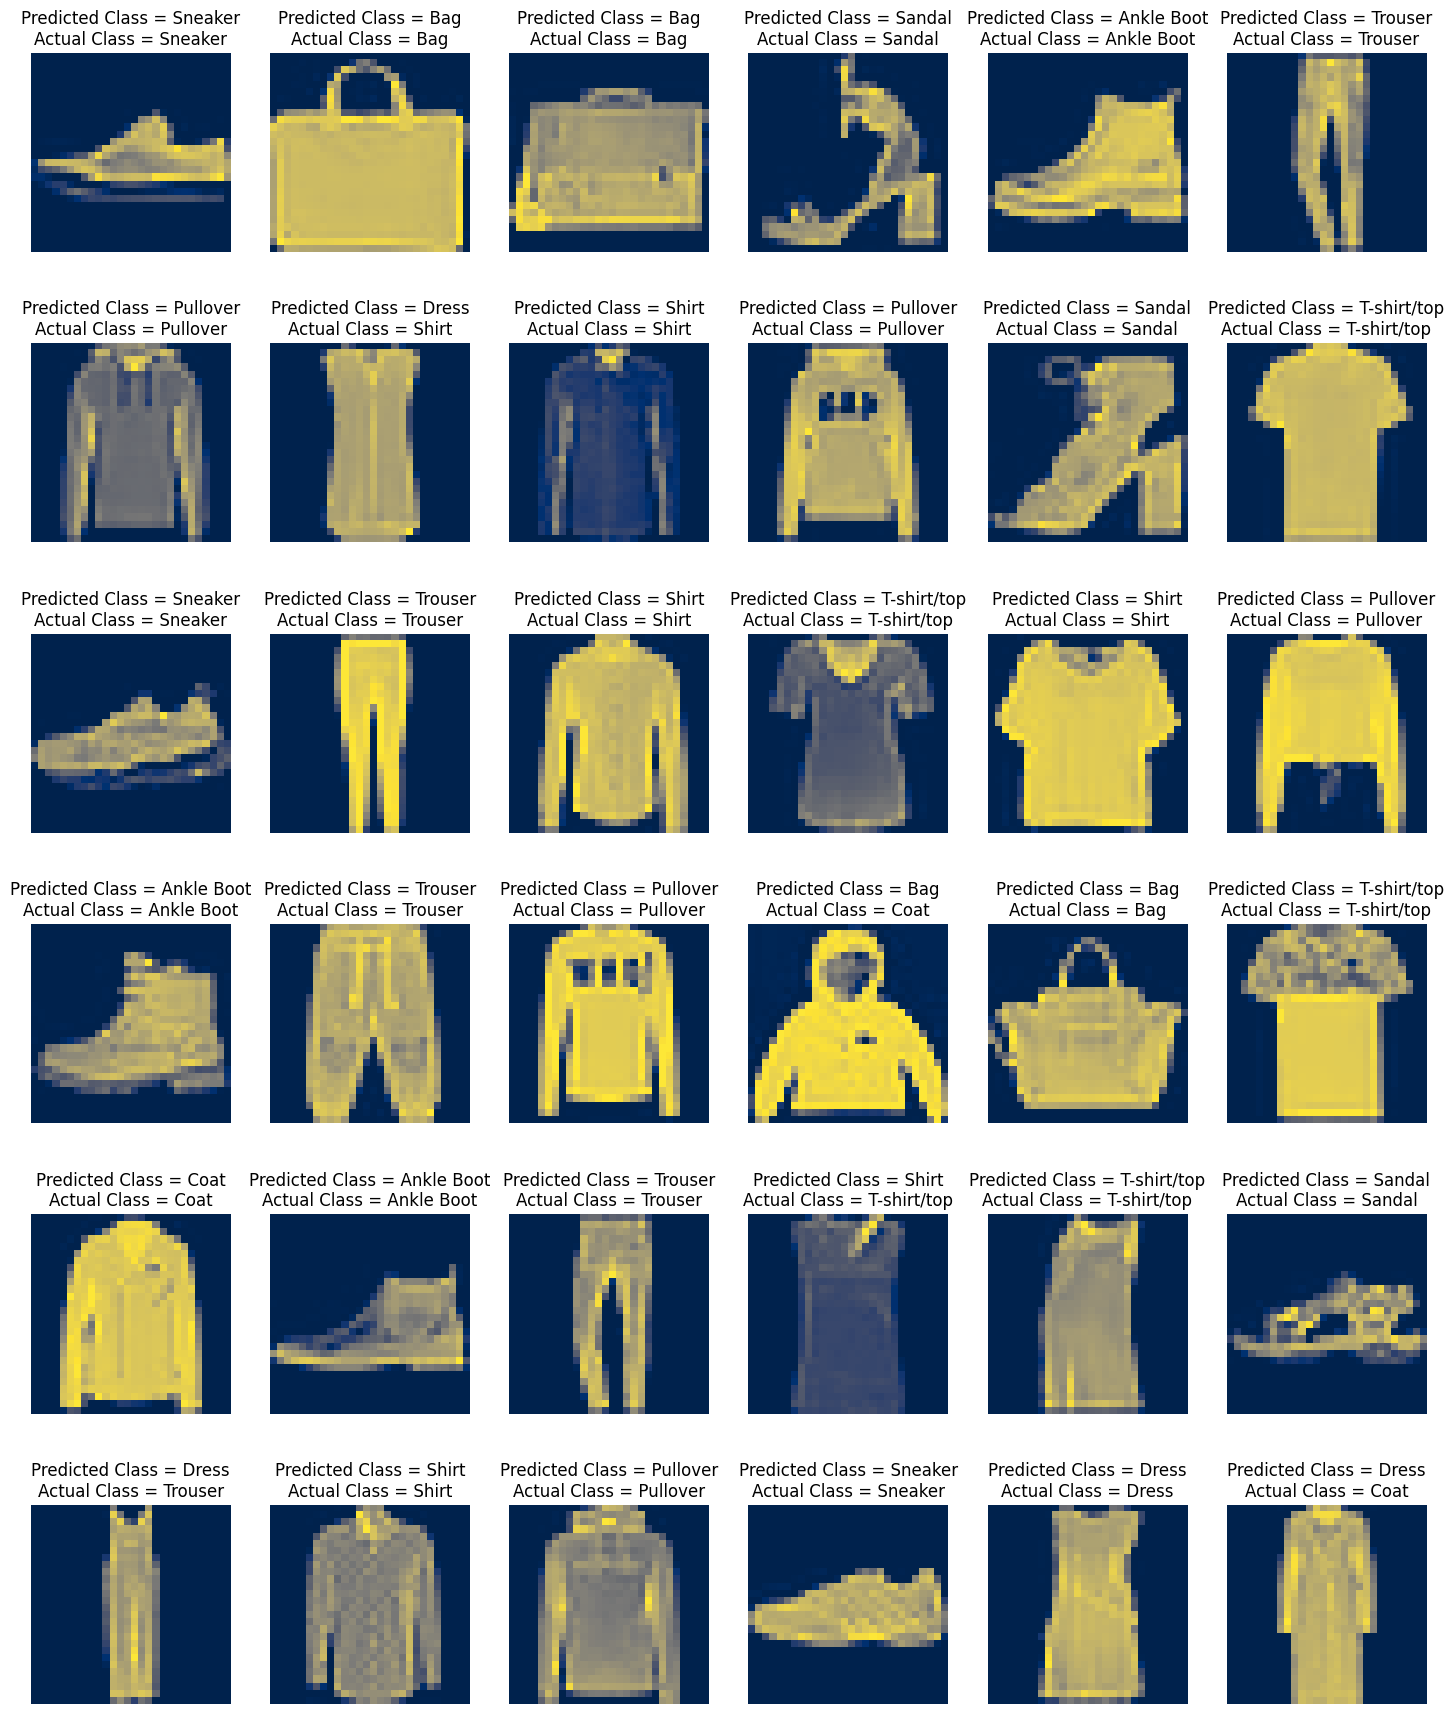

In [68]:
# Predicted targets of each images
fig, ax = plt.subplots(figsize=(18, 22))
for ind, row in enumerate(X_test[:36]):
    plt.subplot(6, 6, ind+1)
    plt.title('Predicted Class = ' + labels[y_pred[ind]] + '\n' + 'Actual Class = ' + labels[y_test[ind]])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.savefig('./ann_predicted_target_images.png')
    plt.imshow(img, cmap='cividis')